Password strength checker

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [ ]:
df = pd.read_csv("data.csv", on_bad_lines='skip')
df.head()


,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [9]:
print(df.isna().sum())
df=df.dropna()
print(df.isna().sum())

password    0
strength    0
dtype: int64
password    0
strength    0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_17852\2146435724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='strength', y='length', data=df, palette="Set2")


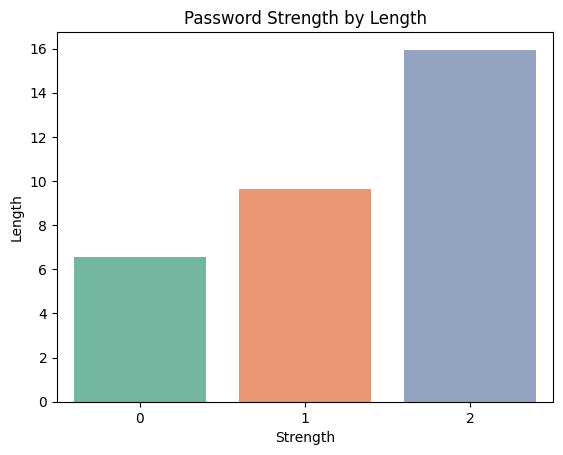

In [13]:
import seaborn as sns
df['length'] = df['password'].apply(len)

# Use seaborn's barplot to show average password length per strength level
sns.barplot(x='strength', y='length', data=df, palette="Set2")
plt.title("Password Strength by Length")
plt.xlabel("Strength")
plt.ylabel("Length")
plt.show()


now we will tokenize the password and  will split the dataset

In [15]:
def word(password):
    char=[]
    for i in password:
        char.append(i)
    return char

x=np.array(df['password'])
y=df['strength']

from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(tokenizer=word)
x=tfid.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



c:\Users\Dell\OneDrive\Desktop\python programs\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


now will train the model

In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
from sklearn.metrics import accuracy_score
ypred=model.predict(x_test)
ypred
acc=accuracy_score(y_test,ypred)
print(acc)

0.9554014097126814


Asking user to enter the password to check the strength

In [31]:
import getpass


user = getpass.getpass("Enter Password: ")


user_t = tfid.transform([user]).toarray()


output = model.predict(user_t)


if output[0]==0:
    print("Weak")
elif output[0]==1:
    print("Medium")
else:
    print("Strong")



Strong
